In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fulldocumentword2.csv" , header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,"""""","""""","""""",1470337707,"""""",1470337707_6684,"""""","""کرونا کرونا کرونا""","""کرونا کرونا کرونا""",1398-11-13 20:40:13,1580663413,"""1""",کرونا کرونا کرونا,"['کرونا', 'کرونا', 'کرونا']"
1,2,2,"""""","""یارانه""","""""",1462058741,"""""",1462058741_58843,"""ابراز علاقه""","""‌ ‌ ‌‌‌ ‌ کرونا کرونا ~~~~ چی میگی میگم دوست ...","""کرونا کرونا چی میگی میگم دوست دارم چصو کرونا ...",1398-11-18 20:39:02,1581095342,"""2""",کرونا کرونا چی میگی میگم دوست دارم چصو کرونا ک...,"['کرونا', 'کرونا', 'چی', 'میگ', 'میگ', 'دوست',..."
2,3,3,"""""","""""","""""",1497732081,"""""",1497732081_549,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا.""","""کرونا اینجا کرونا اونجا کرونا همه جا""",1398-11-14 16:47:33,1580735853,"""57""",کرونا اینجا کرونا اونجا کرونا همه جا,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
3,4,4,"""""","""""","""""",1022917137,"""ranginak97""",1022917137_116487,"""""","""😷کرونا اینجا کرونا اونجا کرونا همه جا. 💉آزمای...","""کرونا اینجا کرونا اونجا کرونا همه جا ازمایش و...",1398-11-12 14:49:57,1580555997,"""168""",کرونا اینجا کرونا اونجا کرونا همه جا ازمایش وا...,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
4,5,5,"""""","""""","""""",1204349583,"""""",1204349583_6792,"""حالت تهوع""","""‏-وای چقدر سرم درد می کنه +کرونا گرفتی -حالت ...","""وای چقدر سرم درد می کنه کرونا گرفتی حالت تهوع...",1398-11-14 13:25:34,1580723734,"""8""",وای چقدر سرم درد می کنه کرونا گرفتی حالت تهوع ...,"['وای', 'چقدر', 'سرم', 'درد', 'می', 'کنه', 'کر..."


In [3]:

df[df.columns[-1]]

0                               ['کرونا', 'کرونا', 'کرونا']
1         ['کرونا', 'کرونا', 'چی', 'میگ', 'میگ', 'دوست',...
2         ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
3         ['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ...
4         ['وای', 'چقدر', 'سرم', 'درد', 'می', 'کنه', 'کر...
                                ...                        
182506    ['قدردانی', 'مامور', 'پلیس', 'ووهان', 'از', 'ت...
182507    ['دو', 'سخنرانی', 'در', 'تهران', 'و', 'واشنگتن...
182508    ['اخ', 'سفید', 'قرار', 'داشت&دارد', 'که', 'نوس...
182509    ['روز', 'اول', 'سفر', 'چند', 'سال', 'بود&باش',...
182510    ['ری', 'نه', 'تنها', 'به', 'اثبات', 'رسیده', '...
Name: 15, Length: 182511, dtype: object

In [4]:
#load stop words
import codecs

from hazm import Normalizer
l = []
with  open('persian-stopwords-master/persian', encoding='utf-8') as f:
    for w in f.readlines():
        l.append(w.replace('\n',''))


len(l)

1316

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=l)
X = vectorizer.fit_transform(df[df.columns[-1]] )
ncomp=128
svd = TruncatedSVD(n_components=ncomp,algorithm='arpack', random_state=42)
dimX = svd.fit_transform(X)

c:\users\lion\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آسانی', 'آسیب', 'اثر', 'احیانا', 'اخیرا', 'ازاین', 'اسلامی', 'اطلاعند', 'الاسف', 'البت', 'الظاهر', 'بااین', 'بازی', 'باوجودی', 'برآن', 'برنامه', 'بسته', 'بطوری', 'بفهمی', 'تازگی', 'تحریم', 'تدریج', 'ترتیب', 'تردید', 'ترند', 'تصریحا', 'تفاوتند', 'تند', 'توؤما', 'تول', 'تک', 'تی', 'ثالثا', 'ثانی', 'جمع', 'جمله', 'جنس', 'جوری', 'حاشیه', 'حسابی', 'حکما', 'خارج', 'خسته', 'خوبی', 'خودبه', 'خودی', 'داند', 'دراین', 'درحالی', 'درشتی', 'درصورتی', 'درعین', 'درپی', 'دسته', 'دلخواه', 'دنبال', 'دیوانه', 'ذاتا', 'ذلک', 'راجع', 'رسد', 'رغم', 'رود', 'روزه', 'روشنی', 'زده', 'زودی', 'ساده', 'سادگی', 'سازهاست', 'سالم', 'ساله', 'ست', 'سرعت', 'سمت', 'سه', 'سهوا', 'سیاه', 'شاأالله', 'شدت', 'صریحا', 'صندوق', 'ضد', 'ضمنا', 'طبق', 'طوری', 'عل', 'علاوه', 'علنا', 'علی', 'عملی', 'عینا', '

In [6]:
dimX.shape

(182511, 128)

## AutoEncoder

In [7]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

In [ ]:
# torch.cuda.is_available()
device = torch.device("cuda:0")
# device

torch.cuda.set_device(0)

# torch.cuda.current_device()
# torch.cuda.device_count()

torch.cuda.get_device_name(torch.cuda.current_device())

In [13]:
# input_dim = X_train_counts.shape[1]
# encoding_dim = 32

input_dim = dimX.shape[1]
encoding_dim = 32

In [ ]:
input_dim

In [11]:
num_epochs = 10000
batch_size = 2048
learning_rate = 1e-4

In [ ]:

# data = spy_sparse2torch_sparse(X_train_counts)

In [ ]:
# dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [9]:
# class autoencoder(nn.Module):
#     def __init__(self):
#         super(autoencoder , self).__init__()
        
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim , 512),
#             nn.ReLU(True),
#             nn.Linear(512 , 256),
#             nn.ReLU(True),
#             nn.Linear(256 , encoding_dim))
        
#         self.decoder = nn.Sequential(
#             nn.Linear(encoding_dim , 256),
#             nn.ReLU(True),
#             nn.Linear(256 , 512),
#             nn.ReLU(True),
#             nn.Linear(512 , input_dim),
#             nn.Tanh())
        
#     def forward(self , x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x
    
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder , self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_dim , 64),
            nn.ReLU(True),
            nn.Dropout(p=0.2),
            nn.Linear(64 , encoding_dim))
        
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim , 64),
            nn.ReLU(True),
            nn.Dropout(p=0.2),
            nn.Linear(64 , input_dim),
            nn.Tanh())
        
    def forward(self , x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    

In [18]:
dimX=dimX.astype('float32')

In [ ]:
import time
torch.rand(1).to(device)

In [ ]:
model = autoencoder().cuda()
print(summary(model, (input_dim,) ))
historyloss=[]

In [ ]:

from torchsummary import summary

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters() , lr = learning_rate , weight_decay=1e-5)
n = dimX.shape[0]
for epoch in range(num_epochs):
    i=0 
    for i in range(n//batch_size):
        t = time.time();
#         inpx = data.to_dense()
        inpx =  torch.from_numpy(dimX[i*batch_size : (i+1)*batch_size])
        inpx = Variable(inpx).cuda()#using gpu vram
        
        #-----------forward-----------
        output = model(inpx)
        loss = criterion(output , inpx)
        
        #-------------backward--------
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         if(i%10==0):
#             print("time pased {} to process ".format(time.time()-t ))
        i+=1
    #------------log-----------------
    if(epoch%50==0):
        print("epoch [{}/{}] , loss:{}".
              format(epoch+1 , num_epochs,loss))
    historyloss.append(loss)    
        

In [ ]:
plt.plot(range(len(historyloss)) ,historyloss ,  )

In [ ]:
torch.save(model.state_dict(), './sim_autoencoder.pth')

In [ ]:
# device = torch.device("cpu")

In [ ]:
model.cuda()

In [15]:
modelcpu = autoencoder().cpu()
modelcpu.load_state_dict(torch.load('./sim_autoencoder.pth'))


<All keys matched successfully>

In [ ]:
model.encoder.cuda()

In [19]:
# inputready = Variable(torch.from_numpy(dimX)).cuda()
# encoder = model.encoder.cuda()
data=modelcpu.encoder(torch.from_numpy(dimX)).detach().numpy()

In [28]:
data.shape

(182511, 32)

In [26]:
from sklearn.cluster import KMeans
nc=10
# losses = []
# for nc in range(50,100):
#     kmeans = KMeans(n_clusters=nc, random_state=0).fit(dimX)

#     losses.append((nc,kmeans.score(dimX)))
kmeans = KMeans(n_clusters=nc, random_state=0).fit(data)
kmeans.score(data)

c:\users\lion\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  


-0.0

In [ ]:
plt.plot([x[0] for x in losses] , [x[1] for x in losses] , 'rp')
plt.show()

## visualization

In [23]:
import random
from sklearn.manifold import TSNE
sample_n = 10000
l=random.sample(list(df.index),sample_n)

datasample = [df.iloc[x][df.columns[-1]] for x in l]
# pred=pipe.predict()
X_embedded = TSNE(n_components=2).fit_transform(
    modelcpu.encoder(torch.from_numpy(
    svd.transform(vectorizer.transform(datasample)).astype('float32')
    )).detach().numpy()
                 )

In [30]:
datapiped = modelcpu.encoder(torch.from_numpy(
    svd.transform(vectorizer.transform(datasample)).astype('float32')
    )).detach().numpy()

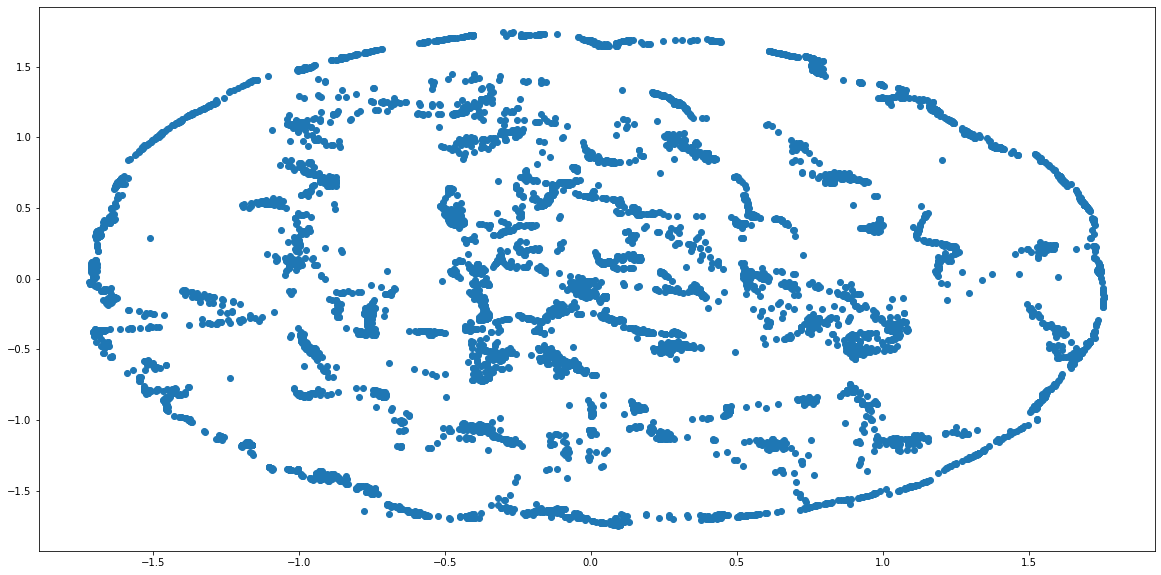

In [31]:
# pred=pipe.predict(datasample)
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[:,0] , X_embedded[:,1]   )
plt.show()